# Simple Linear Regression


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Step 1: Read the Dataset

In [2]:
import pandas as pd 
df=pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Step 2: Perform Basic Data Quality

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

Step 3: Seperate X(RND) and  Y(PROFIT)

In [16]:
X = df[['RND']]
Y = df[['PROFIT']]

In [17]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [18]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt

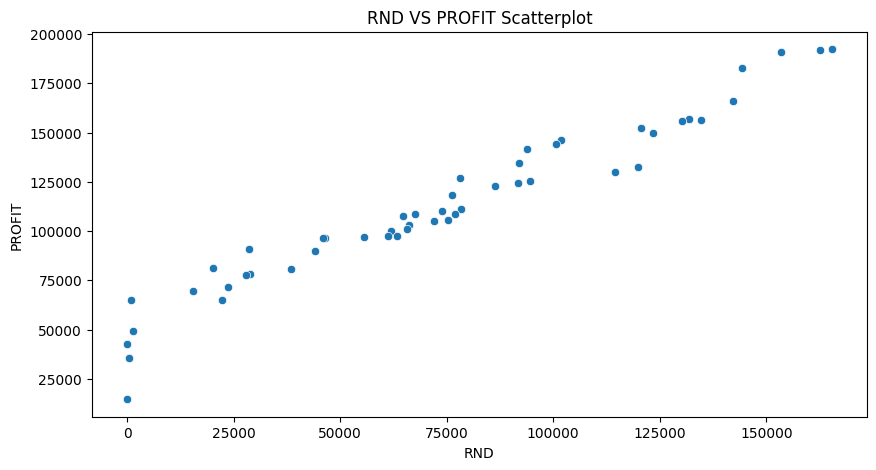

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='RND',y='PROFIT')
plt.title('RND VS PROFIT Scatterplot')
plt.show()